In [1]:
import random
from math import exp, factorial, sqrt
import matplotlib.pyplot as plt

In [6]:
def genpoisson(l) -> int:
    k = 0
    p = exp(-l)
    s = p

    u = random.random()
    while u > s:
        k += 1
        p *= (l / k)
        s += p
    return k

Text(0, 0.5, 'Count of k')

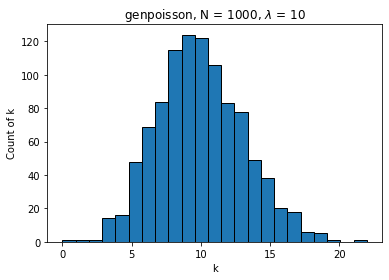

In [165]:
'''
(d)
'''
plt.figure(0)
N = 1000
l = 10
poisson_sample = []
for i in range(N):
    poisson_sample.append(genpoisson(l))
num_k_plot = max(poisson_sample) + 1

plt.hist(poisson_sample, bins = num_k_plot, edgecolor = "black")
plt.title(r'genpoisson, N = 1000, $\lambda$ = 10')
plt.xlabel('k')
plt.ylabel('Count of k')


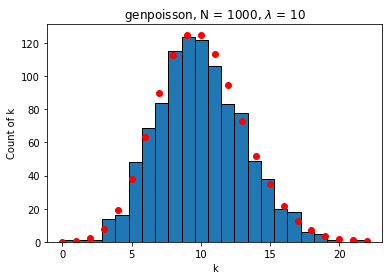

In [168]:
'''
(e)
'''
# I choose to plot the theoretical expected count of k up to 
# the max k achieved in our sample
k, expected = [], []

for i in range(num_k_plot):
    k.append(i)
    p = (l ** i) * exp(-l) / factorial(i)
    expected.append(N * p)

plt.hist(poisson_sample, bins = num_k_plot, zorder = 0, edgecolor = "black")
plt.title(r'genpoisson, N = 1000, $\lambda$ = 10')
plt.xlabel('k')
plt.ylabel('Count of k')
plt.scatter(k, expected, color = "red", zorder = 1)

Text(0, 0.5, 'NP(k)')

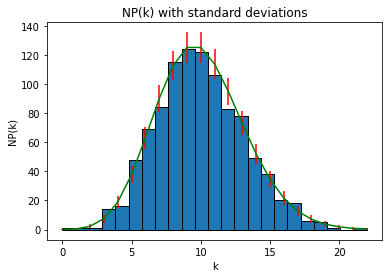

In [171]:
'''
(f)
'''
sdevk = []
for i in range(num_k_plot):
    p = (l ** i) * exp(-l) / factorial(i)
    sdevk.append(sqrt(N * p * (1 - p)))

plt.hist(poisson_sample, bins = num_k_plot, zorder = 0, edgecolor = "black")
plt.errorbar(k, expected, yerr = sdevk, ecolor = "red", color = "green")
plt.title('NP(k) with standard deviations')
plt.xlabel('k')
plt.ylabel('NP(k)')

My numerical counts match the theoretical counts quite well as can be seen by the fact that the majority of my generated counts are within one standard deviation of the the theoretically expected counts.

(g) I have the same confidence in the numerical counts whether they are low or high because as we deduced in part (f), each k that we generate is a Binomial trial for each value of k. Thus, the same number of trials are being run for each k. My confidence is not predicated on the absolute errors I see in my plots but rather by relative comparison to what makes sense considering our theoretical counts.